In [1]:
# ============================================
# PREDICTIVE ANALYTICS PROJECT
# HEART DISEASE UCI DATASET
# ============================================

# Objectives:
# 1. Predict presence of heart disease
# 2. Identify important health indicators
# 3. Compare regression models
# 4. Compare classification models
# 5. Apply unsupervised learning (K-Means)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score
)


In [3]:
df = pd.read_csv("heart_disease_uci (1).csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
print("Missing Values Before Cleaning:")
df.isnull().sum()


Missing Values Before Cleaning:


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
df_clean = df.copy()

# Numerical columns → Median
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical columns → Mode
cat_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Encode binary variables
df_clean['sex'] = df_clean['sex'].map({'Male': 1, 'Female': 0})
df_clean['fbs'] = df_clean['fbs'].astype(int)
df_clean['exang'] = df_clean['exang'].astype(int)

# One-hot encoding
df_encoded = pd.get_dummies(df_clean, drop_first=True)

df_encoded.isnull().sum()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17252\2931421944.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


id                          0
age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
num                         0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

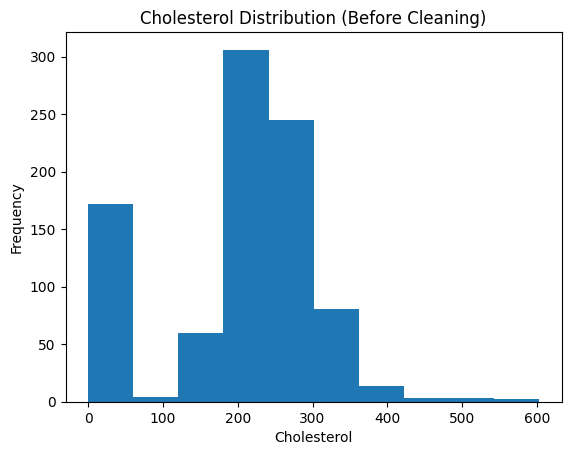

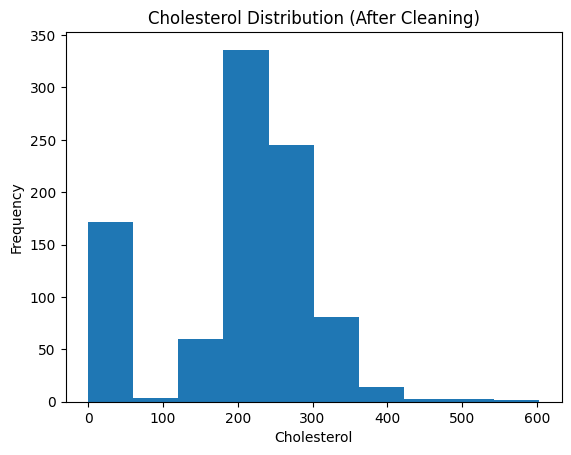

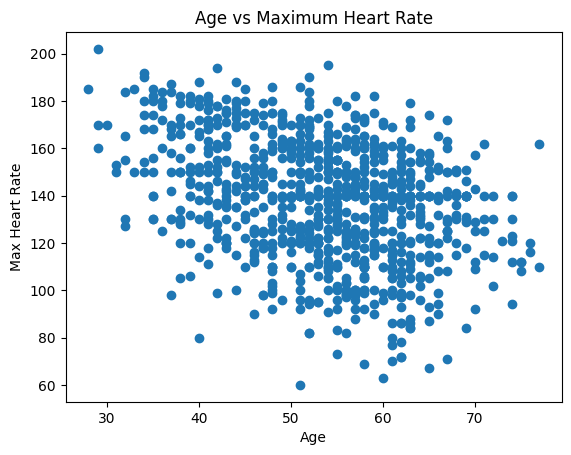

In [6]:
plt.figure()
plt.hist(df['chol'].dropna())
plt.title("Cholesterol Distribution (Before Cleaning)")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df_clean['chol'])
plt.title("Cholesterol Distribution (After Cleaning)")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.scatter(df_clean['age'], df_clean['thalch'])
plt.title("Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()


In [7]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("LINEAR REGRESSION PERFORMANCE")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


LINEAR REGRESSION PERFORMANCE
MAE: 0.6035836558746891
RMSE: 0.827092643962491
R2: 0.473198790490196


In [9]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train > 0)

y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("LOGISTIC REGRESSION PERFORMANCE")
print("MAE:", mean_absolute_error(y_test > 0, y_pred_prob))
print("RMSE:", np.sqrt(mean_squared_error(y_test > 0, y_pred_prob)))


LOGISTIC REGRESSION PERFORMANCE
MAE: 0.2247220436737737
RMSE: 0.3389423980190831


In [10]:
y_class = (df_encoded['num'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN PERFORMANCE")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


KNN PERFORMANCE
Accuracy: 0.8152173913043478
F1 Score: 0.8349514563106796
[[64 11]
 [23 86]]


In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("DECISION TREE PERFORMANCE")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


DECISION TREE PERFORMANCE
Accuracy: 0.8152173913043478
F1 Score: 0.8365384615384616
[[63 12]
 [22 87]]


In [13]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("NAIVE BAYES PERFORMANCE")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))


NAIVE BAYES PERFORMANCE
Accuracy: 0.8152173913043478
F1 Score: 0.8380952380952381


In [14]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

print("SVM PERFORMANCE")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC:", roc_auc_score(y_test, y_prob_svm))


SVM PERFORMANCE
Accuracy: 0.7554347826086957
F1 Score: 0.7619047619047619
AUC: 0.7910703363914373


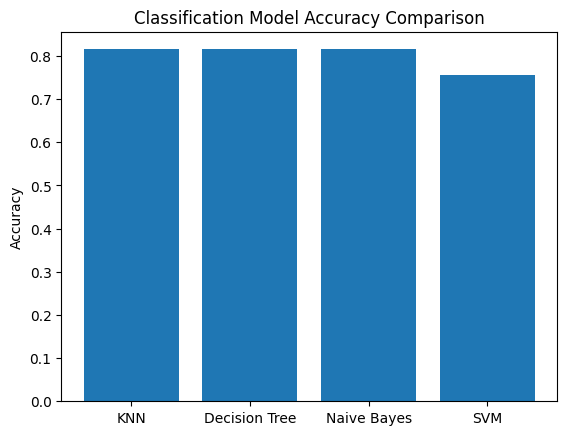

In [15]:
models = ['KNN', 'Decision Tree', 'Naive Bayes', 'SVM']
accuracy = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure()
plt.bar(models, accuracy)
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [16]:
cluster_features = df_clean[['age', 'chol', 'trestbps', 'thalch', 'oldpeak']]

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)


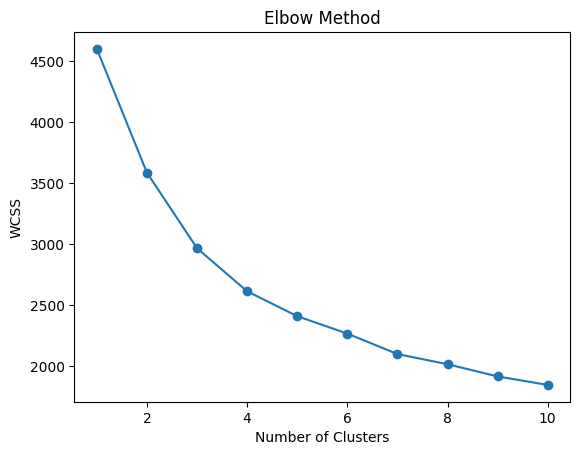

In [17]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


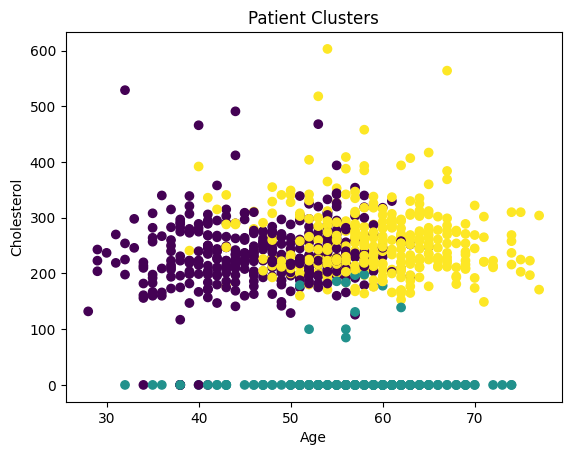

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)

df_clean['Cluster'] = clusters

plt.figure()
plt.scatter(df_clean['age'], df_clean['chol'], c=clusters)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Patient Clusters")
plt.show()
